<h1><center>Workshop: K-means and PCA for segmentation</center></h1>

# 1. Importation des librairies de Python nécessaires

In [88]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Génération de données simulées

In [89]:
X, y = make_blobs(n_samples=500, n_features=5, centers=4, random_state=42)

#### La taille des données

In [90]:
print(f"Taille des données: {X.shape}")

Taille des données: (500, 5)


# 3. Visualisation des Données

les données ont plus de 4 dimensions, on doit réduire leur dimensionnalité pour les visualiser.Pour cela on peut utiliser l'analyse en composantes principales (**PCA**) pour réduire les données à 2 dimensions.

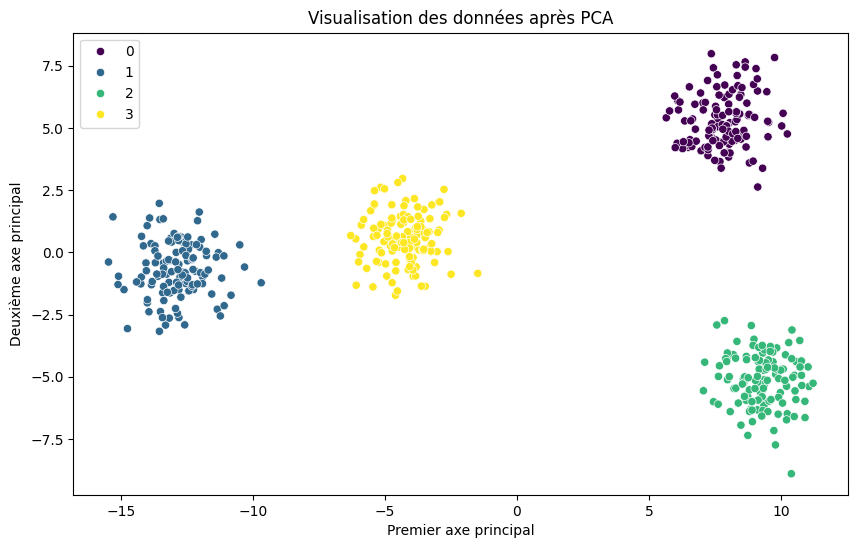

In [104]:
# Réduction de la dimensionnalité à 2 dimensions pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisation des données
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Premier axe principal')
plt.ylabel('Deuxième axe principal')
plt.title('Visualisation des données après PCA')
plt.show()

# 4.  Implémentation de l’Algorithme K-means


#### a. Initialisation Aléatoire

In [105]:
kmeans_random = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
kmeans_random.fit(X)

# Prédiction des clusters
labels_random = kmeans_random.labels_

# Affichage des centres
centers_random = kmeans_random.cluster_centers_
print("Centres des clusters (Initialisation Aléatoire):")
print(centers_random)

Centres des clusters (Initialisation Aléatoire):
[[-2.47555395  8.91844236  4.75402806  1.96802416 -6.95204041]
 [-6.98354008 -8.7518611   7.37901293  2.28804852  4.26234467]
 [-9.50789054  9.53000845  6.61491931 -5.63366645 -6.39047321]
 [-6.3345608  -3.93976884  0.39820355 -1.39284558 -3.97753497]]


#### b. K-means++

In [106]:
kmeans_plus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_plus.fit(X)

# Prédiction des clusters
labels_plus = kmeans_plus.labels_

# Affichage des centres
centers_plus = kmeans_plus.cluster_centers_
print("Centres des clusters (K-means++):")
print(centers_plus)

Centres des clusters (K-means++):
[[-2.47555395  8.91844236  4.75402806  1.96802416 -6.95204041]
 [-6.98354008 -8.7518611   7.37901293  2.28804852  4.26234467]
 [-6.3345608  -3.93976884  0.39820355 -1.39284558 -3.97753497]
 [-9.50789054  9.53000845  6.61491931 -5.63366645 -6.39047321]]


### Visualisation des Clusters

#### Réduction des centres à 2 dimensions avec PCA

In [94]:
centers_random_pca = pca.transform(centers_random)
centers_plus_pca = pca.transform(centers_plus)

#### Visualisation des clusters pour l'initialisation aléatoire

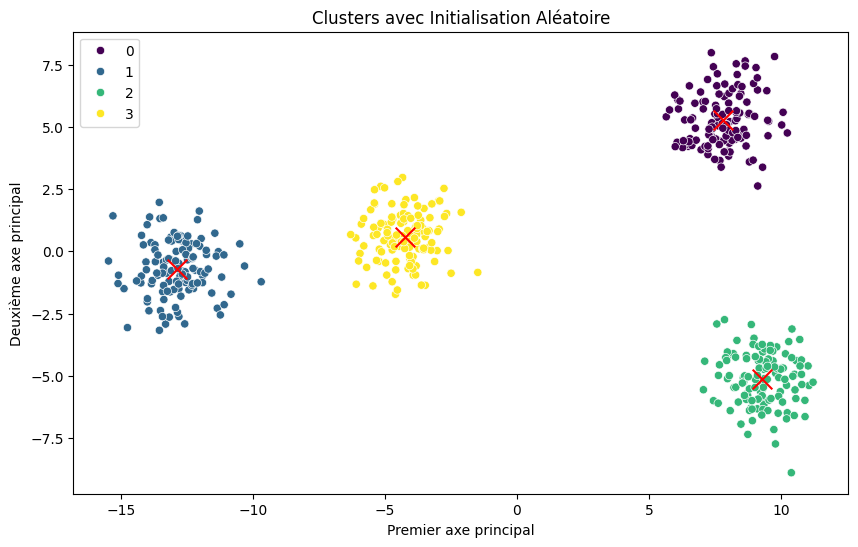

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_random, palette='viridis')
plt.scatter(centers_random_pca[:, 0], centers_random_pca[:, 1], c='red', marker='x', s=200)
plt.xlabel('Premier axe principal')
plt.ylabel('Deuxième axe principal')
plt.title('Clusters avec Initialisation Aléatoire')
plt.show()

#### Visualisation des clusters pour K-means++

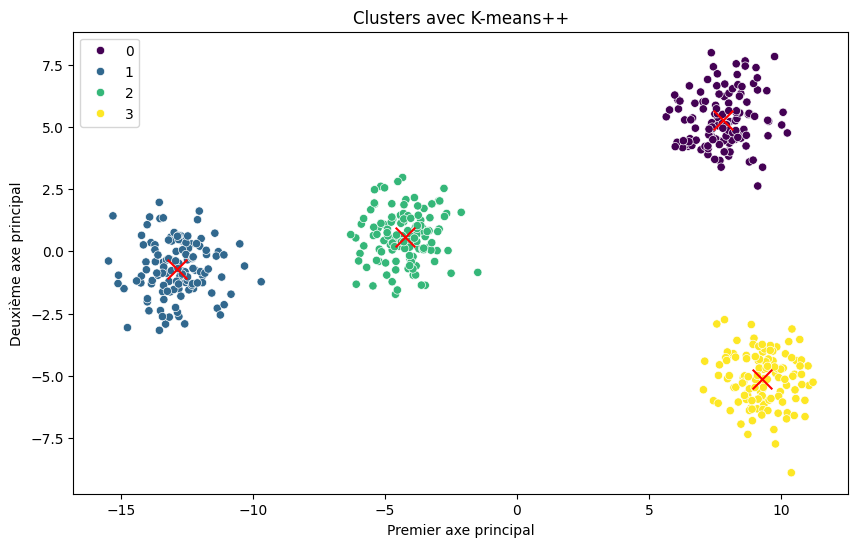

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_plus, palette='viridis')
plt.scatter(centers_plus_pca[:, 0], centers_plus_pca[:, 1], c='red', marker='x', s=200)
plt.xlabel('Premier axe principal')
plt.ylabel('Deuxième axe principal')
plt.title('Clusters avec K-means++')
plt.show()

# 5. Méthodes de Validation de Clustering

#### Indice de Silhouette


In [97]:
silhouette_avg_random = silhouette_score(X, labels_random)
silhouette_avg_plus = silhouette_score(X, labels_plus)
print(f"Indice de silhouette (Initialisation Aléatoire): {silhouette_avg_random:.3f}")
print(f"Indice de silhouette (K-means++): {silhouette_avg_plus:.3f}")

Indice de silhouette (Initialisation Aléatoire): 0.747
Indice de silhouette (K-means++): 0.747


#### Score de Calinski-Harabasz

In [98]:
calinski_harabasz_random = calinski_harabasz_score(X, labels_random)
calinski_harabasz_plus = calinski_harabasz_score(X, labels_plus)
print(f"Score de Calinski-Harabasz (Initialisation Aléatoire): {calinski_harabasz_random:.3f}")
print(f"Score de Calinski-Harabasz (K-means++): {calinski_harabasz_plus:.3f}")

Score de Calinski-Harabasz (Initialisation Aléatoire): 3715.491
Score de Calinski-Harabasz (K-means++): 3715.491


#### Indice de Davies-Bouldin

In [99]:
davies_bouldin_random = davies_bouldin_score(X, labels_random)
davies_bouldin_plus = davies_bouldin_score(X, labels_plus)
print(f"Indice de Davies-Bouldin (Initialisation Aléatoire): {davies_bouldin_random:.3f}")
print(f"Indice de Davies-Bouldin (K-means++): {davies_bouldin_plus:.3f}")

Indice de Davies-Bouldin (Initialisation Aléatoire): 0.364
Indice de Davies-Bouldin (K-means++): 0.364


#### Méthode de l'élbow pour déterminer le nombre optimal de clusters

In [100]:
def elbow_method(X, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Distorsion')
    plt.title("Méthode de l'élbow")
    plt.show()

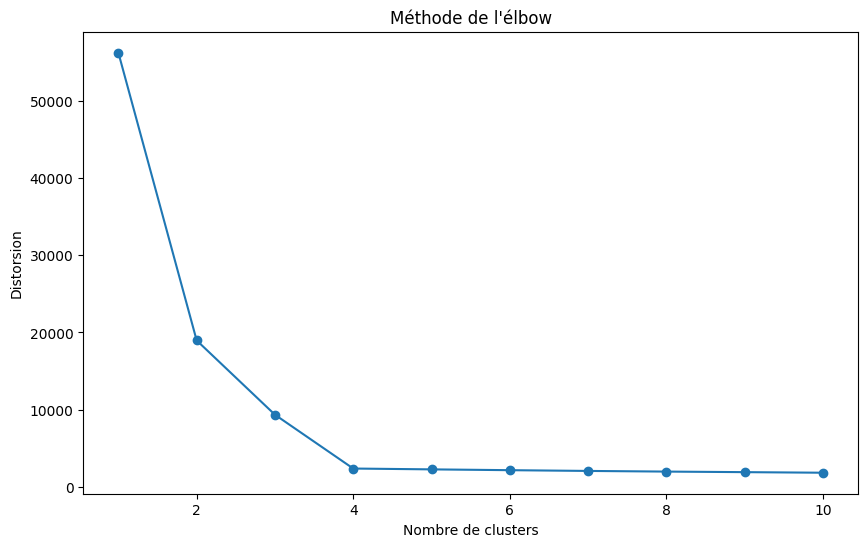

In [101]:
elbow_method(X, max_k=10)

# 6. Interprétation des Résultats

### Indice de Silhouette :

**Initialisation Aléatoire** : 0.747

**K-means++** : 0.747

**Interprétation**:
Les deux méthodes d'initialisation (aléatoire et K-means++) ont produit des clusters avec des indices de silhouette identiques et élevés (0.747).
les deux méthodes ont réussi à segmenter les données de manière efficace et similaire.

### Score de Calinski-Harabasz

**Initialisation Aléatoire** : 3715.491

**K-means++** : 3715.491

**Interprétation**:
Les scores de Calinski-Harabasz sont également identiques pour les deux méthodes.
Un score élevé de Calinski-Harabasz indique une bonne densité et séparation des clusters.
Les deux méthodes d'initialisation ont donc produit des clusters de haute qualité.

### Indice de Davies-Bouldin :

**Initialisation Aléatoire** : 0.364

**K-means++** : 0.364

**Interprétation**:
Les indices de Davies-Bouldin sont identiques pour les deux méthodes.
Un indice de Davies-Bouldin plus faible indique de meilleurs clusters (moins de chevauchement entre clusters).
Les deux méthodes ont produit des clusters bien distincts et compacts.

### Méthode de l'élbow

- Le graphe de la méthode de l'élbow montre une "coude" clair au niveau de 4 clusters.

- Cela suggère que 4 est le nombre optimal de clusters pour ce jeu de données.

- Au-delà de 4 clusters, la réduction de la distorsion devient marginale, ce qui signifie que l'ajout de clusters supplémentaires n'améliore pas significativement la segmentation.

# 7. Meilleur modèle de Clustering

Étant donné que tous les indicateurs de performance sont identiques pour les deux méthodes d'initialisation, on peux pas conclure qu'une méthode est meilleure que l'autre en termes de qualité des clusters.

Cependant, dans la pratique,**K-means++** est généralement préféré car il tend à converger plus rapidement et de manière plus stable que l'initialisation aléatoire. K-means++ choisit intelligemment les centres initiaux pour accélérer la convergence et améliorer la qualité des clusters.

# 8. Peut on représenter les données avec les poids des centres obtenus ?

Nous pouvons représenter les données en utilisant les coordonnées des centres des clusters obtenus. Pour cela, nous allons effectuer une réduction de dimensionnalité via l'Analyse en Composantes Principales (ACP) et projeter les centres des clusters dans cet espace réduit.

# 9. Analyse en Composantes Principales (PCA)

#### a. Nouvelle Matrice des Observations

In [102]:
from sklearn.decomposition import PCA

# Application de l'PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.13447932e+01, -2.28643792e+00],
       [ 7.43938042e+00, -6.00222435e+00],
       [ 9.20866566e+00, -4.41724049e+00],
       [ 1.05715813e+01, -4.39376626e+00],
       [ 7.61055439e+00,  5.33125005e+00],
       [ 8.56835551e+00, -5.08576523e+00],
       [-4.20496288e+00,  2.07874122e+00],
       [-1.33014086e+01, -2.92341356e+00],
       [ 9.64302091e+00, -4.44946989e+00],
       [-4.28947862e+00,  1.18743711e+00],
       [ 7.49200832e+00,  5.52426104e+00],
       [-1.20916688e+01,  1.27208021e+00],
       [-1.22440633e+01, -1.49471669e+00],
       [-1.39047403e+01,  1.38195121e+00],
       [-1.29005389e+01, -1.85360451e-03],
       [ 7.56610579e+00, -2.91849003e+00],
       [ 7.64404327e+00,  4.44114034e+00],
       [-1.27987972e+01, -1.50719819e+00],
       [ 8.68238893e+00, -4.18133930e+00],
       [ 9.83515221e+00, -3.84074937e+00],
       [-3.02191158e+00,  2.87375477e-02],
       [-3.81937140e+00,  2.34246559e-01],
       [ 1.05067667e+01, -4.93999659e+00],
       [ 8.

#### b. Valeurs Propres et Vecteurs Propres Associés aux Axes Principaux

In [103]:
eigenvalues = pca.explained_variance_
print("Valeurs propres :")
print(eigenvalues)

eigenvectors = pca.components_
print("Vecteurs propres :")
print(eigenvectors)

Valeurs propres :
[83.73533925 14.84968182]
Vecteurs propres :
[[ 0.0275173   0.86927694  0.00647878 -0.18277972 -0.45842121]
 [ 0.67774994  0.03427744 -0.25389588  0.66923612 -0.16474214]]


#### c. Inertie de Chaque Axe

In [77]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Inertie de chaque axe :")
print(explained_variance_ratio)

Inertie de chaque axe :
[0.7437459 0.1318964]


#### d. Somme des Inerties

In [81]:
# Vérification de la somme des inerties
sum_explained_variance_ratio = np.sum(explained_variance_ratio)
print(f"Somme des inerties : {sum_explained_variance_ratio:.3f}")

Somme des inerties : 0.876


#### e. Représentation des Données et Centres sur les Deux Axes Principaux

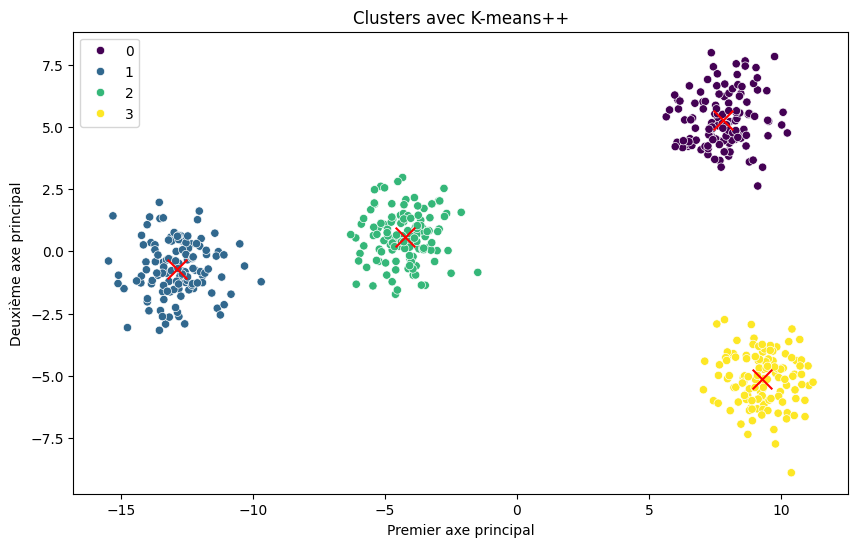

In [85]:
# Implémentation de K-means avec initialisation K-means++
kmeans_plus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_plus.fit(X)

# Prédiction des clusters
labels_plus = kmeans_plus.labels_

# Affichage des centres
centers_plus = kmeans_plus.cluster_centers_

# Projection des centres dans l'espace réduit pour visualisation
centers_plus_pca = pca.transform(centers_plus)

# Visualisation des clusters avec K-means++
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_plus, palette='viridis')
plt.scatter(centers_plus_pca[:, 0], centers_plus_pca[:, 1], c='red', marker='x', s=200)
plt.xlabel('Premier axe principal')
plt.ylabel('Deuxième axe principal')
plt.title('Clusters avec K-means++')
plt.show()

#### f. Interprétation des Résultats

**Valeurs Propres et Vecteurs Propres** :

Les valeurs propres indiquent la quantité de variance expliquée par chaque axe principal.
Les vecteurs propres (ou axes principaux) montrent la direction des axes principaux dans l'espace des caractéristiques d'origine.

**Inertie de Chaque Axe**:

L'inertie de chaque axe représente la proportion de la variance totale expliquée par cet axe.
Une inertie élevée sur les premiers axes est souhaitable, car cela signifie que ces axes capturent la majorité de la variance des données.

**Représentation des Données et des Centres** :

La visualisation montre la distribution des données et la position des centres des clusters dans les deux dimensions principales.
Les centres des clusters, représentés par des croix rouges, indiquent les points moyens autour desquels les données sont groupées.
Une bonne séparation des clusters dans cet espace réduit indique que les clusters sont bien formés.